# Challenge $0$


## 1. ***Data cleaning with Pandas***

Use the library `pandas` to load and clean the required dataset.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os

Obtain the data file

In [ ]:
FFILE = './50_Startups.csv'
if os.path.isfile(FFILE):
    print("File already exists")
    if os.access(FFILE, os.R_OK):
        print ("File is readable")
    else:
        print ("File is not readable, removing it and downloading again")
        !rm FFILE
        !wget "https://raw.github.com/alexdepremia/ML_IADA_UTs/main/challenge_0/50_Startups.csv"
else:
    print("Either the file is missing or not readable, download it")
    !wget "https://raw.github.com/alexdepremia/ML_IADA_UTs/main/challenge_0/50_Startups.csv"

Either the file is missing or not readable, download it
--2023-04-17 13:59:06--  https://raw.github.com/alexdepremia/ML_IADA_UTs/main/challenge_0/50_Startups.csv
Resolving raw.github.com (raw.github.com)... 185.199.111.133, 185.199.110.133, 185.199.108.133, ...
Connecting to raw.github.com (raw.github.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://raw.githubusercontent.com/alexdepremia/ML_IADA_UTs/main/challenge_0/50_Startups.csv [following]
--2023-04-17 13:59:07--  https://raw.githubusercontent.com/alexdepremia/ML_IADA_UTs/main/challenge_0/50_Startups.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.109.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2436 (2.4K) [text/plain]
Saving to: ‘50_Startups.csv’

50_Startups.csv     100%[====

In [ ]:
# load the dataset using pandas
data = pd.read_csv('50_Startups.csv')
# extract data feature matrix and labels
X = data.iloc[:,:-2].values
y = data.iloc[:,3].values
df = pd.DataFrame(data)

In [ ]:
y

array(['New York', 'California', 'Florida', 'New York', 'Florida',
       'New York', 'California', 'Florida', 'New York', 'California',
       'Florida', 'California', 'Florida', 'California', 'Florida',
       'New York', 'California', 'New York', 'Florida', 'New York',
       'California', 'New York', 'Florida', 'Florida', 'New York',
       'California', 'Florida', 'New York', 'Florida', 'New York',
       'Florida', 'New York', 'California', 'Florida', 'California',
       'New York', 'Florida', 'California', 'New York', 'California',
       'California', 'Florida', 'California', 'New York', 'California',
       'New York', 'Florida', 'California', 'New York', 'California'],
      dtype=object)

***Play with data***

In [ ]:
df.shape

(50, 5)

In [ ]:
df.replace(to_replace = 0.00, value = df.mean(axis=0), inplace=True)  # inject the mean of the column when value is 0
df.head()

<ipython-input-6-d736410e1b73>:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.replace(to_replace = 0.00, value = df.mean(axis=0), inplace=True)  # inject the mean of the column when value is 0


,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


***Select two categories for binary classification***

In [ ]:
df_sel=df[(df.State=="California") | (df.State=="Florida")]

In [ ]:
df_sel.head() # column title and first rows of the dataset

,R&D Spend,Administration,Marketing Spend,State,Profit
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
4,142107.34,91391.77,366168.42,Florida,166187.94
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60


In [ ]:
df_sel.dtypes # type of each column

R&D Spend          float64
Administration     float64
Marketing Spend    float64
State               object
Profit             float64
dtype: object

***Encode categorical data***

One-hot encoding of categorical feature _State_

In [ ]:
df_one = pd.get_dummies(df_sel["State"])

In [ ]:
df_one.head()

,California,Florida
1,1,0
2,0,1
4,0,1
6,1,0
7,0,1


In [ ]:
# construct the final dataset that you will use for learning and prediction
df_fin = pd.concat((df_one, df_sel), axis=1)
df_fin = df_fin.drop(["Florida"], axis=1)
df_fin = df_fin.drop(["State"], axis=1)
# California is class 1, Florida is class 0
df_fin = df_fin.rename(columns={"California": "State"})
df_fin.head()

,State,R&D Spend,Administration,Marketing Spend,Profit
1,1,162597.70,151377.59,443898.53,191792.06
2,0,153441.51,101145.55,407934.54,191050.39
4,0,142107.34,91391.77,366168.42,166187.94
6,1,134615.46,147198.87,127716.82,156122.51
7,0,130298.13,145530.06,323876.68,155752.60


***Normalize***

Divide by the absolute value of the maximum so that features are in \[0, 1\]

In [ ]:
def absolute_maximum_scale(series):
    return series / series.abs().max()

for col in df_fin.columns:
    df_fin[col] = absolute_maximum_scale(df_fin[col])

In [ ]:
df_fin.head()

,State,R&D Spend,Administration,Marketing Spend,Profit
1,1.0,1.000000,0.828805,1.000000,1.000000
2,0.0,0.943688,0.553781,0.918982,0.996133
4,0.0,0.873981,0.500378,0.824892,0.866501
6,1.0,0.827905,0.805926,0.287716,0.814020
7,0.0,0.801353,0.796789,0.729619,0.812091


***Classification***

Prepare the dataset:

In [ ]:
y = df_fin["State"] # ground truth labels
X = df_fin.drop(["State"], axis=1) # datapoints features
# extract actual values from series
y = y.values
X = X.values

Train test split

$75\%$ of the data are in the training set, the remaining $25\%$ constitutes the test set.

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y , test_size=0.25, random_state=0)

Train the Logistic Regression Model

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
LR = LogisticRegression(random_state=0, solver='lbfgs').fit(X_train, y_train)
LR.predict(X_test)
round(LR.score(X_test,y_test), 4)    # accuracy

0.3333

***Plot results***

<ipython-input-19-99f26bc1af6f>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = df.corr()


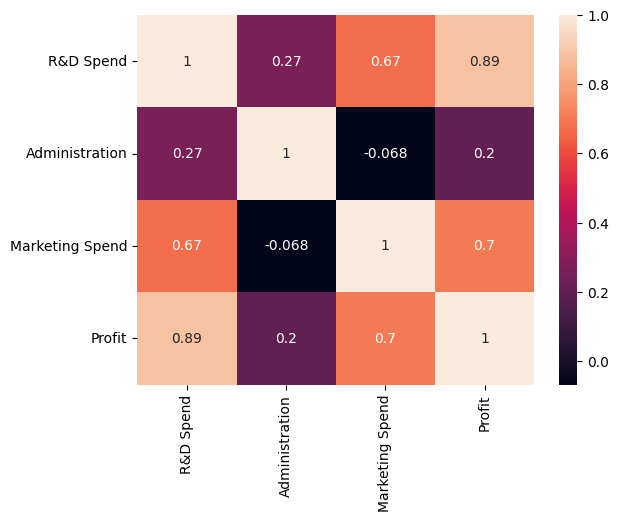

In [ ]:
import seaborn as sns
correlation = df.corr()
sns.heatmap(correlation, annot=True)
plt.show()

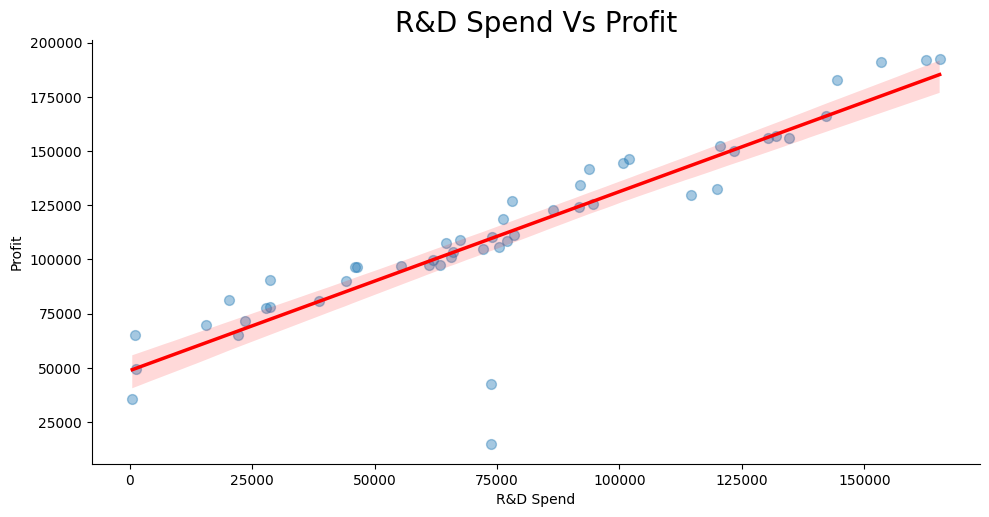

In [ ]:
sns.lmplot(data=df, x='R&D Spend',y='Profit',order=1,line_kws={'color':'red','linewidth':2.5},height=5,aspect=2,scatter_kws={'s':50,'alpha':0.4})
plt.title('R&D Spend Vs Profit',size=20)
plt.show()

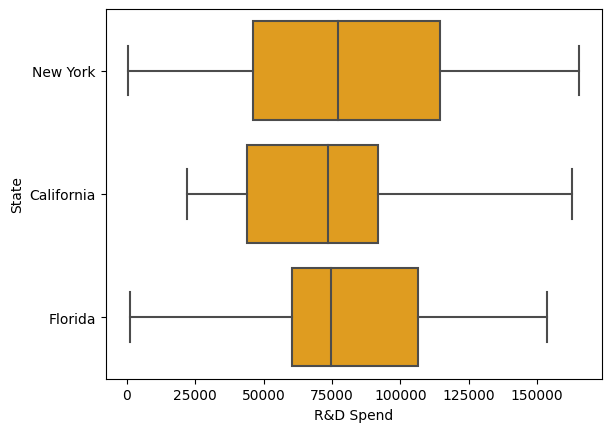

In [ ]:
sns.boxplot(data=df, x='R&D Spend', y = 'State', color='orange')
plt.show()

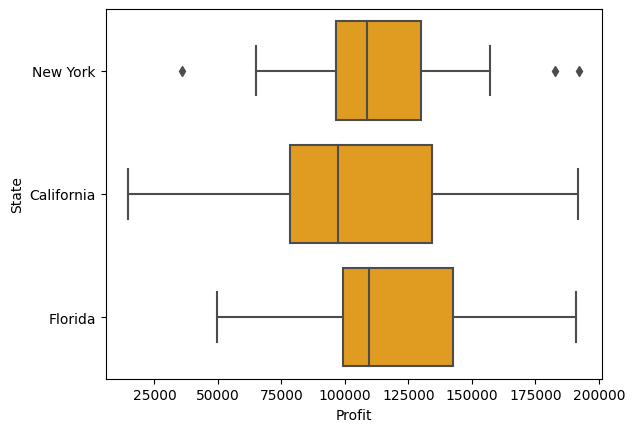

In [ ]:
sns.boxplot(data=df, x='Profit', y = 'State', color='orange')
plt.show()

***Add regularization***

Implement from scratch the regularized logistic regression model (with all the regularization techniques seen during the course).

In [ ]:
import numpy.linalg as LA

def sigmoidM(X, w):
    h = 1/(1+np.exp(-np.matmul(X,w)))
    return h

def RidgeSquareLoss(X, labels, w, lam):
    n = np.shape(X)[0]   #numero di punti nel dataset 33
    L = -(1/n)*np.sum(labels*np.log(sigmoidM(X,w)) + (1-labels)*np.log(1-sigmoidM(X,w))) + lam*LA.norm(w,2)/n
    return L

def LogisticGradient(X, labels, w, points):
    return (1/points)*(np.transpose(X)@(sigmoidM(X,w)-labels))

def RidgeGradient(w, lam, points):
    return ((1/points)*2*lam*w)

def GDRidge(X, labels, iter, gamma, d, lam, points):
    W = np.zeros((d,iter))
    L = np.zeros(iter)
    w = np.random.normal(0,0.1,d)
    #Un alternativa è settare in partenza tutti 0:
    #w = np.zeros(d[1])
    for i in range(iter):
        W[:,i] = w
        w = w - gamma * (LogisticGradient(X, labels, w, points) + RidgeGradient(w, lam, points))
        L[i] = RidgeSquareLoss(X,labels,w,lam)
    return W, L

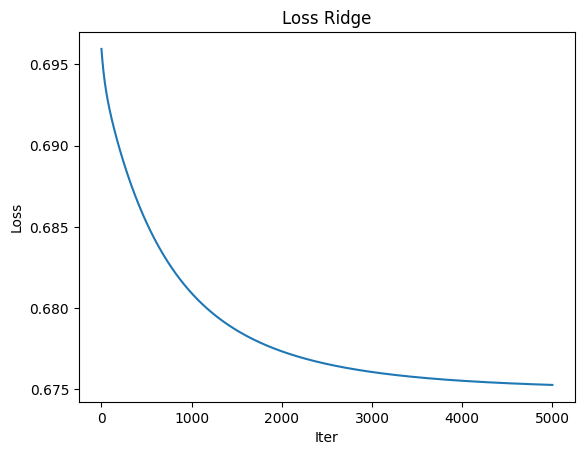

In [ ]:
d = np.shape(X)[1]
points = np.shape(X)[0]
iter = 5000
lam = 0.1
gamma = 0.05

wgd, L = GDRidge(X, y, iter, gamma, d, lam, points)

plt.plot(L)
plt.title('Loss Ridge')
plt.xlabel('Iter')
plt.ylabel('Loss')
plt.show()

In [ ]:
def LassoSquareLoss(X, labels, w, lam):
    n = np.shape(X)[0]
    L = -(1/n)*np.sum(labels*np.log(sigmoidM(X,w)) + (1-labels)*np.log(1-sigmoidM(X,w))) + lam*LA.norm(w,1)/n
    return L

def L1_subgradient(z):
    g = np.ones(z.shape)
    g[z < 0.] = -1.0
    return g

def LassoGradient(w, lam, points):
    return (lam * L1_subgradient(w)) / points

def GDLasso(X, labels, iter, gamma, d, lam):
    W = np.zeros((d,iter))
    L = np.zeros(iter)
    w = np.random.normal(0, 0.1, d)
    for i in range(iter):
        W[:,i] = w
        w = w - gamma * (LogisticGradient(X, labels, w, points) + LassoGradient(w, lam, points))
        L[i] = LassoSquareLoss(X,labels,w,lam)
    return W, L

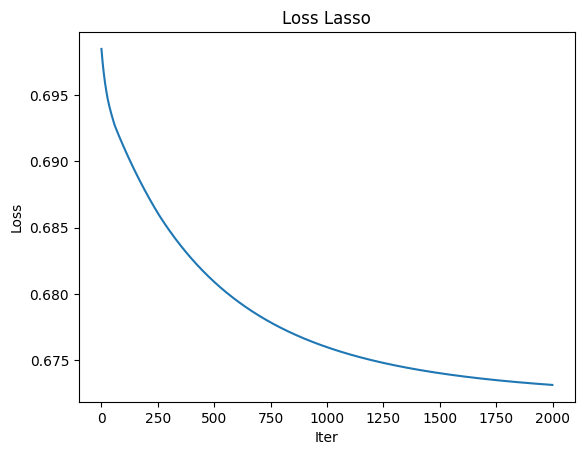

In [ ]:
d = np.shape(X)[1]
points = np.shape(X)[0]
iter = 2000
gamma = 0.1
lam = 0.05

wgdL, L = GDLasso(X, y, iter, gamma, d, lam)

plt.plot(L)
plt.title('Loss Lasso')
plt.xlabel('Iter')
plt.ylabel('Loss')
plt.show()

In [ ]:
def ElasticNetSquareLoss(X, labels, w, lam, lamr):
    n = np.shape(X)[0]
    L = -(1/n)*np.sum(labels*np.log(sigmoidM(X,w)) + (1-labels)*np.log(1-sigmoidM(X,w))) + (lamr*lam*LA.norm(w,1) + (1-lamr)*lam*LA.norm(w,2))/n
    return L

def ElasticNetGradient(X, labels, w, lam, lamr, points):
    return LogisticGradient(X, labels, w, points) + lamr*LassoGradient(w,lam,points) + (1-lamr)*RidgeGradient(w,lam,points)

def GDElasticNet(X, labels, iter, gamma, lam, lamr):
    points = np.shape(X)[0]
    d = np.shape(X)[1]
    W = np.zeros((d,iter))
    L = np.zeros(iter)
    w = np.random.normal(0, 0.1, d)
    for i in range(iter):
        W[:,i] = w
        w = w - gamma * ElasticNetGradient(X, labels, w, lam, lamr, points)
        L[i] = ElasticNetSquareLoss(X, labels, w, lam, lamr)
    return W, L

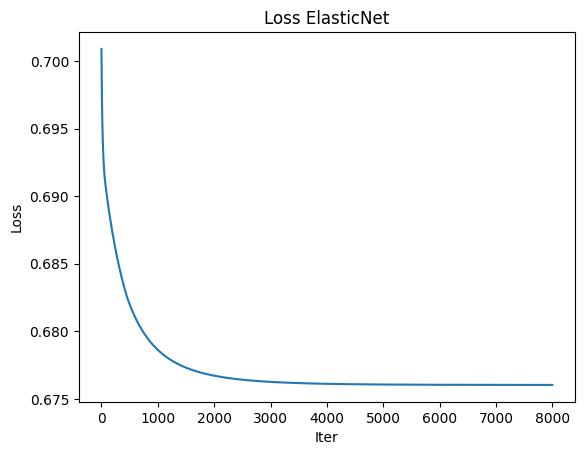

In [ ]:
iter = 8000
points = np.shape(X)[0]
gamma = 0.1
lam = 0.1
lamr = 0.5

wgdEN, L = GDElasticNet(X, y, iter, gamma, lam, lamr)

plt.plot(L)
plt.title('Loss ElasticNet')
plt.xlabel('Iter')
plt.ylabel('Loss')
plt.show()

***Model assessment***

Given true and predicted values, compute the most common classification metrics to assess the quality of your predictions.

In [ ]:
from sklearn.metrics import classification_report
y_true = y_test
y_pred = LR.predict(X_test)

target_names = ['California', 'Florida']
print(classification_report(y_true, y_pred, target_names=target_names))

              precision    recall  f1-score   support

  California       0.33      1.00      0.50         3
     Florida       0.00      0.00      0.00         6

    accuracy                           0.33         9
   macro avg       0.17      0.50      0.25         9
weighted avg       0.11      0.33      0.17         9



/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Repeat the previous task for regularized logistic regression and compare the results.

In [ ]:
# GDRidge(X, y, iter, gamma, d, lam, points)
wR,cR = GDRidge(X_train,y_train,5000,0.1,4,0.5,33)
pesiR = wR[:,-1]
previsioniR = sigmoidM(X_test,pesiR)

yR_true = y_test
yR_pred = np.round(previsioniR)

target_names = ['California', 'Florida']
print(classification_report(yR_true, yR_pred, target_names=target_names))

              precision    recall  f1-score   support

  California       0.38      1.00      0.55         3
     Florida       1.00      0.17      0.29         6

    accuracy                           0.44         9
   macro avg       0.69      0.58      0.42         9
weighted avg       0.79      0.44      0.37         9



In [ ]:
# GDLasso(X, y, iter, gamma, d, lam)
wL,cL = GDLasso(X_train,y_train,80000,0.5,4,1)
pesiL = wL[:,-1]
previsioniL = sigmoidM(X_test,pesiL)

yL_true = y_test
yL_pred = np.round(previsioniL)

target_names = ['California', 'Florida']
print(classification_report(yL_true, yL_pred, target_names=target_names))

              precision    recall  f1-score   support

  California       0.33      1.00      0.50         3
     Florida       0.00      0.00      0.00         6

    accuracy                           0.33         9
   macro avg       0.17      0.50      0.25         9
weighted avg       0.11      0.33      0.17         9



/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
# GDElasticNet(X, y, iter, gamma, lam, lamr)
wEN,cEN = GDElasticNet(X_train,y_train,8000,0.1,0.3,0.5)
pesiEN = wEN[:,-1]
previsioniEN = sigmoidM(X_test,pesiEN)

yEN_true = y_test
yEN_pred = np.round(previsioniEN)

target_names = ['California', 'Florida']
print(classification_report(yEN_true, yEN_pred, target_names=target_names))

              precision    recall  f1-score   support

  California       0.29      0.67      0.40         3
     Florida       0.50      0.17      0.25         6

    accuracy                           0.33         9
   macro avg       0.39      0.42      0.33         9
weighted avg       0.43      0.33      0.30         9



***ROC curve***

Implement a function for producing the Receiver Operating Characteristic (ROC) curve.

Given true and predicted values, plot the ROC curve using your implemented function.

Area under curve=0.33333333333333326


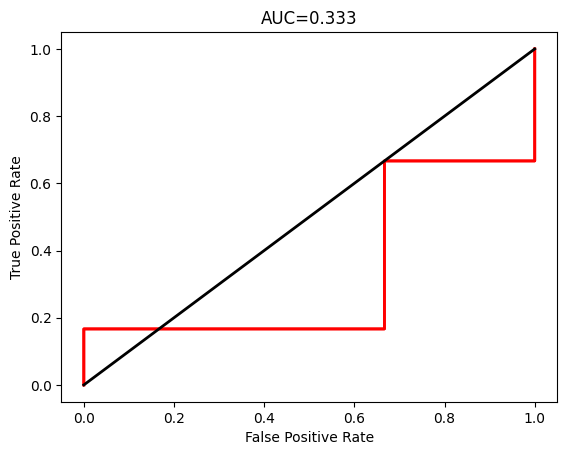

In [ ]:
def perf_metrics(y_actual, y_hat,threshold):
    tp = 0; fp = 0; tn = 0; fn = 0

    for i in range(len(y_hat)):
        if(y_hat[i][1] >= threshold):
            if(y_actual[i] == 1):
                tp += 1
            else:
                fp += 1
        elif(y_hat[i][1] < threshold):
            if(y_actual[i] == 0):
                tn += 1
            else:
                fn += 1

    tpr = tp/(tp+fn)
    fpr = fp/(tn+fp)

    return [fpr,tpr]

pred = LR.predict_proba(X_test)
fpr,tpr =perf_metrics(y_test, pred,0.5)

#Now we calculate FPR and TPR for different thresholds and get AUC and ROC
thresholds = list(np.linspace(0,1,2000))

roc_points = []
for threshold in thresholds:
    rates = perf_metrics(y_test, pred, threshold)
    roc_points.append(rates)

fpr_array = []
tpr_array = []
for i in range(len(roc_points)-1):
    point1 = roc_points[i];
    point2 = roc_points[i+1]
    tpr_array.append([point1[0], point2[0]])
    fpr_array.append([point1[1], point2[1]])

#We use Trapezoidal rule to calculate the area under the curve and approximating the intergral
auc = sum(np.trapz(tpr_array,fpr_array))+1
print('Area under curve={}'.format(auc))

plt.plot(tpr_array,fpr_array, 'r', lw=2)
plt.plot([0, 1], [0, 1], 'k-', lw=2)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('AUC={}'.format(round(auc,3)))
plt.show()

In [ ]:
!pip install scikit-plot
!python setup.py install

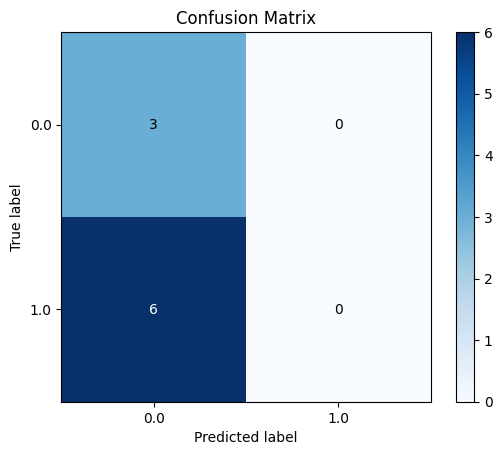

In [ ]:
import scikitplot as skplt
import matplotlib.pyplot as plt
skplt.metrics.plot_confusion_matrix(y_test,y_pred)
plt.show()